### Import libraries

In [3]:
# Ingore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# mlrose: created by Genevieve Hayes, modified by Andrew Rollings
import mlrose

# Numpy
import numpy as np

In [5]:
# Sklearn metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Sklearn model selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Plotting
import matplotlib.pyplot as plt

### Load and preprocess data

In [6]:
# Train Data
X_train = np.genfromtxt('./data/Spambase_X_train.csv', delimiter=',')
# Test Data
X_test = np.genfromtxt('./data/Spambase_X_test.csv', delimiter=',')

# # Train Labels
y_train = np.genfromtxt('./data/Spambase_y_train.csv', delimiter=',')
# Test Labels
y_test = np.genfromtxt('./data/Spambase_y_test.csv', delimiter=',')

In [7]:
# Standardize data with StandardScaler
scaler = StandardScaler()

# Fit scaler to the training set
scaler.fit(X_train)

# Preprocess Train Data
X_train = scaler.transform(X_train)
# Preprocess Test Data
X_test = scaler.transform(X_test)

### Plotting functions

In [8]:
def val_plot(param_range, train_scores, test_scores, y_min=0.8, y_max=1.0, title=None,
             x_label='Parameter C', y_label='Accuracy', scale_x=False, save_as=None):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(param_range, train_mean, 
             color='blue', marker='o', 
             markersize=5, label='training accuracy')

    plt.fill_between(param_range, train_mean + train_std,
                     train_mean - train_std, alpha=0.15,
                     color='blue')

    plt.plot(param_range, test_mean, 
             color='green', linestyle='--', 
             marker='s', markersize=5, 
             label='validation accuracy')

    plt.fill_between(param_range, 
                     test_mean + test_std,
                     test_mean - test_std, 
                     alpha=0.15, color='green')

    plt.grid()
    if scale_x == True:
        plt.xscale('log')
    plt.legend(loc='best')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.ylim([y_min, y_max])
    plt.tight_layout()
    if save_as != None:
        plt.savefig('./figures/' + save_as + '.png', dpi=300)
    plt.show()

In [9]:
def roc_plot(fpr, tpr, label, title=None, save_as=None):    
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr,
             color='blue',
             linestyle='-.',
             label='%s (auc = %0.3f)' % (label, roc_auc))

    plt.plot([0, 0, 1],
             [0, 1, 1],
             lw=2,
             linestyle=':',
             color='black',
             label='perfect performance')

    plt.plot([0, 1],
             [0, 1],
             linestyle='--',
             color=(0.6, 0.6, 0.6),
             label='random guessing')

    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.grid()
    plt.title(title)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')

    plt.tight_layout()
    if save_as != None:
        plt.savefig('./figures/' + save_as + '.png', dpi=300)
    plt.show()

### AUC Scorer

In [10]:
scorer = make_scorer(roc_auc_score)

### Randomized Hill Climbing

In [8]:
nn_rhc = mlrose.NeuralNetwork(hidden_nodes=[120], activation='relu', 
                              algorithm='random_hill_climb', 
                              max_iters=1000, bias=True, is_classifier=True, 
                              learning_rate=0.001, early_stopping=True,
                              clip_max=5, max_attempts=10, restarts=None, random_state=42)

In [11]:
%%time
param_range = [1, 2, 3, 4, 5]
train_scores, test_scores = validation_curve(estimator=nn_rhc, 
                                             X=X_train, 
                                             y=y_train, 
                                             param_name='restarts', 
                                             param_range=param_range,
                                             scoring=scorer,
                                             cv=5)

Wall time: 27min 51s


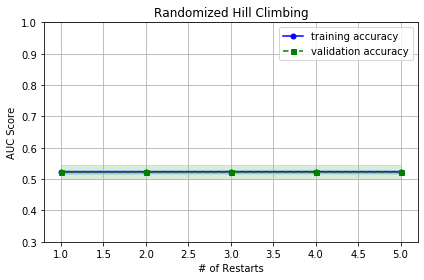

In [12]:
val_plot(param_range, train_scores, test_scores, title='Randomized Hill Climbing',
         x_label='# of Restarts', y_label='AUC Score', 
         y_min=0.3, y_max=1.0, save_as='RHC/Spambase_restarts')

In [41]:
nn_rhc = mlrose.NeuralNetwork(hidden_nodes=[120], activation='relu', 
                              algorithm='random_hill_climb', 
                              max_iters=None, bias=True, is_classifier=True, 
                              learning_rate=0.001, early_stopping=False,
                              clip_max=5, max_attempts=10, restarts=5, random_state=42)

In [42]:
%%time
epochs = 200
param_range = [i for i in range(1, epochs+1, 10)]
train_scores, test_scores = validation_curve(estimator=nn_rhc, 
                                             X=X_train, 
                                             y=y_train, 
                                             param_name='max_iters', 
                                             param_range=param_range,
                                             cv=5)

Wall time: 15min 53s


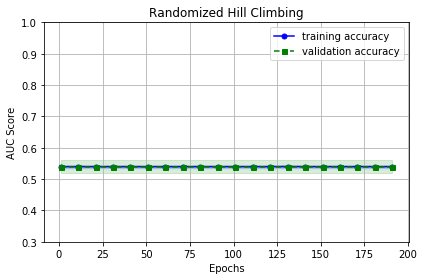

In [43]:
val_plot(param_range, train_scores, test_scores, title='Randomized Hill Climbing', 
         x_label='Epochs', y_label='AUC Score', 
         y_min=0.3, y_max=1.0, save_as='RHC/Spambase_epochs')

In [11]:
nn_rhc = mlrose.NeuralNetwork(hidden_nodes=[120], activation='relu', 
                              algorithm='random_hill_climb', 
                              max_iters=1000, bias=True, is_classifier=True, 
                              learning_rate=0.001, early_stopping=True,
                              clip_max=5, max_attempts=10, restarts=5, random_state=42)

In [12]:
%%time
nn_rhc.fit(X_train, y_train)

Wall time: 1min 29s


NeuralNetwork(activation='relu', algorithm='random_hill_climb', bias=True,
              clip_max=5, curve=False, early_stopping=True, hidden_nodes=[120],
              is_classifier=True, learning_rate=0.001, max_attempts=10,
              max_iters=1000, mutation_prob=0.1, pop_size=200, random_state=42,
              restarts=5,
              schedule=GeomDecay(init_temp=1.0, decay=0.99, min_temp=0.001))

In [13]:
%%time
y_pred = nn_rhc.predict(X_test)
print('Test Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Test AUC: %.3f' % roc_auc_score(y_test, y_pred))

Test Accuracy: 0.545
Test AUC: 0.532
Wall time: 11 ms


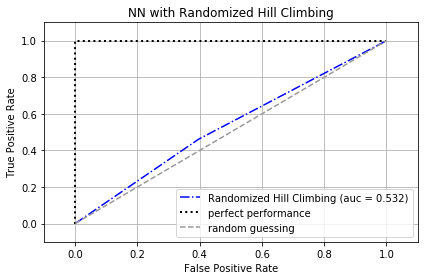

In [14]:
fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                 y_score=y_pred)
roc_plot(fpr, tpr, label='Randomized Hill Climbing', title='NN with Randomized Hill Climbing', save_as='RHC/Spambase_roc')

### Simulated Annealing

In [38]:
nn_sa = mlrose.NeuralNetwork(hidden_nodes=[120], activation='relu', 
                             algorithm='simulated_annealing', 
                             max_iters=1000, bias=True, is_classifier=True, 
                             learning_rate=0.001, early_stopping=True, schedule=mlrose.GeomDecay(init_temp=100.0), 
                             clip_max=5, max_attempts=10, random_state=42)

In [39]:
%%time
param_range = [0.8, 0.85, 0.9, 0.95, 0.99]
train_scores, test_scores = validation_curve(estimator=nn_sa, 
                                             X=X_train, 
                                             y=y_train, 
                                             param_name='schedule', 
                                             param_range=[mlrose.GeomDecay(decay=i) for i in param_range], 
                                             scoring=scorer, 
                                             cv=5)

Wall time: 9min 15s


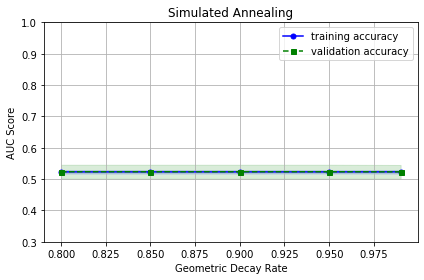

In [40]:
val_plot(param_range, train_scores, test_scores, title='Simulated Annealing', 
         x_label='Geometric Decay Rate', y_label='AUC Score', 
         y_min=0.3, y_max=1.0, save_as='SA/Spambase_decay')

In [44]:
nn_sa = mlrose.NeuralNetwork(hidden_nodes=[120], activation='relu', 
                             algorithm='simulated_annealing', 
                             max_iters=None, bias=True, is_classifier=True, 
                             learning_rate=0.001, early_stopping=False, schedule=mlrose.GeomDecay(decay=0.99), 
                             clip_max=5, max_attempts=10, random_state=42)

In [45]:
%%time
epochs = 200
param_range = [i for i in range(1, epochs+1, 10)]
train_scores, test_scores = validation_curve(estimator=nn_sa, 
                                             X=X_train, 
                                             y=y_train, 
                                             param_name='max_iters', 
                                             param_range=param_range,
                                             cv=5)

Wall time: 3min 25s


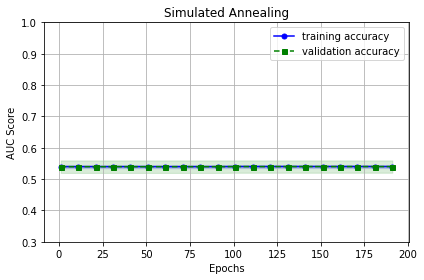

In [46]:
val_plot(param_range, train_scores, test_scores, title='Simulated Annealing', 
         x_label='Epochs', y_label='AUC Score', 
         y_min=0.3, y_max=1.0, save_as='SA/Spambase_epochs')

In [15]:
nn_sa = mlrose.NeuralNetwork(hidden_nodes=[120], activation='relu', 
                             algorithm='simulated_annealing', 
                             max_iters=1000, bias=True, is_classifier=True, 
                             learning_rate=0.001, early_stopping=True, schedule=mlrose.GeomDecay(decay=0.99), 
                             clip_max=5, max_attempts=10, random_state=42)

In [16]:
%%time
nn_sa.fit(X_train, y_train)

Wall time: 26.3 s


NeuralNetwork(activation='relu', algorithm='simulated_annealing', bias=True,
              clip_max=5, curve=False, early_stopping=True, hidden_nodes=[120],
              is_classifier=True, learning_rate=0.001, max_attempts=10,
              max_iters=1000, mutation_prob=0.1, pop_size=200, random_state=42,
              restarts=0,
              schedule=GeomDecay(init_temp=1.0, decay=0.99, min_temp=0.001))

In [17]:
%%time
y_pred = nn_sa.predict(X_test)
print('Test Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Test AUC: %.3f' % roc_auc_score(y_test, y_pred))

Test Accuracy: 0.544
Test AUC: 0.532
Wall time: 8.07 ms


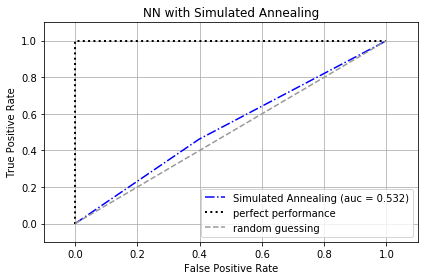

In [18]:
fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                 y_score=y_pred)
roc_plot(fpr, tpr, label='Simulated Annealing', title='NN with Simulated Annealing', save_as='SA/Spambase_roc')

### Genetic Algorithm

In [17]:
nn_ga = mlrose.NeuralNetwork(hidden_nodes=[120], activation='relu', 
                             algorithm='genetic_alg', 
                             max_iters=1000, bias=True, is_classifier=True, 
                             learning_rate=0.001, early_stopping=True, mutation_prob=None, 
                             pop_size=200, clip_max=5, max_attempts=10, random_state=42)

In [18]:
%%time
param_range = [0.05, 0.1, 0.15, 0.2, 0.25]
train_scores, test_scores = validation_curve(estimator=nn_ga, 
                                             X=X_train, 
                                             y=y_train, 
                                             param_name='mutation_prob', 
                                             param_range=param_range,
                                             scoring=scorer,
                                             cv=5)

Wall time: 32min 46s


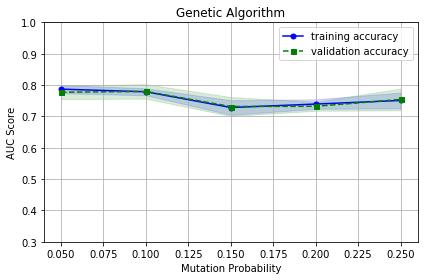

In [19]:
val_plot(param_range, train_scores, test_scores, title='Genetic Algorithm', 
         x_label='Mutation Probability', y_label='AUC Score', 
         y_min=0.3, y_max=1.0, save_as='GA/Spambase_mutation')

In [24]:
nn_ga = mlrose.NeuralNetwork(hidden_nodes=[120], activation='relu', 
                             algorithm='genetic_alg', 
                             max_iters=1000, bias=True, is_classifier=True, 
                             learning_rate=0.001, early_stopping=True, mutation_prob=0.1, 
                             pop_size=None, clip_max=5, max_attempts=10, random_state=42)

In [25]:
%%time
param_range = [100, 200, 300, 400, 500]
train_scores, test_scores = validation_curve(estimator=nn_ga, 
                                             X=X_train, 
                                             y=y_train, 
                                             param_name='pop_size', 
                                             param_range=param_range,
                                             scoring=scorer,
                                             cv=5)

Wall time: 39min 36s


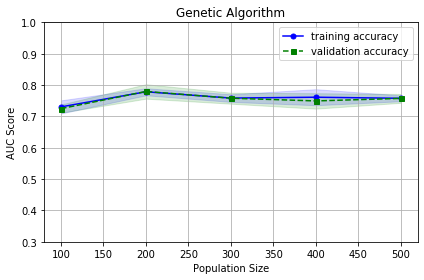

In [26]:
val_plot(param_range, train_scores, test_scores, title='Genetic Algorithm', 
         x_label='Population Size', y_label='AUC Score', 
         y_min=0.3, y_max=1.0, save_as='GA/Spambase_popsize')

In [35]:
nn_ga = mlrose.NeuralNetwork(hidden_nodes=[120], activation='relu', 
                             algorithm='genetic_alg', 
                             max_iters=None, bias=True, is_classifier=True, 
                             learning_rate=0.001, early_stopping=False, mutation_prob=0.1, 
                             pop_size=200, clip_max=5, max_attempts=10, random_state=42)

In [36]:
%%time
epochs = 200
param_range = [i for i in range(1, epochs+1, 10)]
train_scores, test_scores = validation_curve(estimator=nn_ga, 
                                             X=X_train, 
                                             y=y_train, 
                                             param_name='max_iters', 
                                             param_range=param_range,
                                             cv=5)

Wall time: 6h 48min 31s


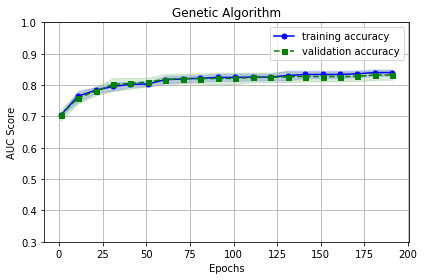

In [37]:
val_plot(param_range, train_scores, test_scores, title='Genetic Algorithm', 
         x_label='Epochs', y_label='AUC Score', 
         y_min=0.3, y_max=1.0, save_as='GA/Spambase_epochs')

In [19]:
nn_ga = mlrose.NeuralNetwork(hidden_nodes=[120], activation='relu', 
                             algorithm='genetic_alg', 
                             max_iters=1000, bias=True, is_classifier=True, 
                             learning_rate=0.001, early_stopping=True, mutation_prob=0.1, 
                             pop_size=200, clip_max=5, max_attempts=10, random_state=42)

In [20]:
%%time
nn_ga.fit(X_train, y_train)

Wall time: 42.8 s


NeuralNetwork(activation='relu', algorithm='genetic_alg', bias=True, clip_max=5,
              curve=False, early_stopping=True, hidden_nodes=[120],
              is_classifier=True, learning_rate=0.001, max_attempts=10,
              max_iters=1000, mutation_prob=0.1, pop_size=200, random_state=42,
              restarts=0,
              schedule=GeomDecay(init_temp=1.0, decay=0.99, min_temp=0.001))

In [21]:
%%time
y_pred = nn_ga.predict(X_test)
print('Test Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Test AUC: %.3f' % roc_auc_score(y_test, y_pred))

Test Accuracy: 0.749
Test AUC: 0.741
Wall time: 8.49 ms


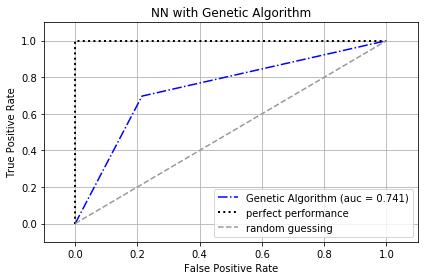

In [22]:
fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                 y_score=y_pred)
roc_plot(fpr, tpr, label='Genetic Algorithm', title='NN with Genetic Algorithm', save_as='GA/Spambase_roc')

### Gradient Descent

In [20]:
nn_gd = mlrose.NeuralNetwork(hidden_nodes=[120], activation='relu', 
                             algorithm='gradient_descent', 
                             max_iters=1000, bias=True, is_classifier=True, 
                             learning_rate=0.001, early_stopping=True, 
                             clip_max=5, max_attempts=10, random_state=42)

In [21]:
%%time
param_range = [0.1, 0.01, 0.001, 0.0001, 0.00001]
train_scores, test_scores = validation_curve(estimator=nn_gd, 
                                             X=X_train, 
                                             y=y_train, 
                                             param_name='learning_rate', 
                                             param_range=param_range,
                                             scoring=scorer, 
                                             cv=5)

Wall time: 14min 49s


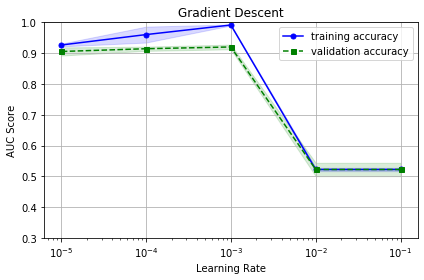

In [23]:
val_plot(param_range, train_scores, test_scores, title='Gradient Descent', 
         x_label='Learning Rate', y_label='AUC Score', scale_x=True, 
         y_min=0.3, y_max=1.0, save_as='GD/Spambase_lr')

In [60]:
nn_gd = mlrose.NeuralNetwork(hidden_nodes=[120], activation='relu', 
                             algorithm='gradient_descent', 
                             max_iters=None, bias=True, is_classifier=True, 
                             learning_rate=0.001, early_stopping=False, 
                             clip_max=5, max_attempts=10, random_state=42)

In [61]:
%%time
epochs = 200
param_range = [i for i in range(1, epochs+1, 10)]
train_scores, test_scores = validation_curve(estimator=nn_gd, 
                                             X=X_train, 
                                             y=y_train, 
                                             param_name='max_iters', 
                                             param_range=param_range,
                                             cv=5)

Wall time: 5min 32s


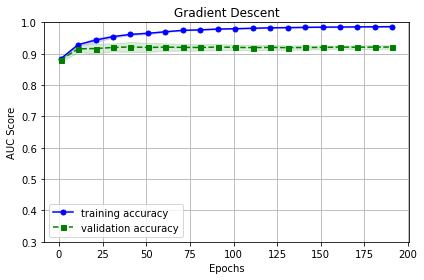

In [62]:
val_plot(param_range, train_scores, test_scores, title='Gradient Descent', 
         x_label='Epochs', y_label='AUC Score', 
         y_min=0.3, y_max=1.0, save_as='GD/Spambase_epochs')

In [23]:
nn_gd = mlrose.NeuralNetwork(hidden_nodes=[120], activation='relu', 
                             algorithm='gradient_descent', 
                             max_iters=1000, bias=True, is_classifier=True, 
                             learning_rate=0.001, early_stopping=True, 
                             clip_max=5, max_attempts=10, random_state=42)

In [24]:
%%time
nn_gd.fit(X_train, y_train)

Wall time: 45.2 s


NeuralNetwork(activation='relu', algorithm='gradient_descent', bias=True,
              clip_max=5, curve=False, early_stopping=True, hidden_nodes=[120],
              is_classifier=True, learning_rate=0.001, max_attempts=10,
              max_iters=1000, mutation_prob=0.1, pop_size=200, random_state=42,
              restarts=0,
              schedule=GeomDecay(init_temp=1.0, decay=0.99, min_temp=0.001))

In [25]:
%%time
y_pred = nn_gd.predict(X_test)
print('Test Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Test AUC: %.3f' % roc_auc_score(y_test, y_pred))

Test Accuracy: 0.939
Test AUC: 0.933
Wall time: 11.5 ms


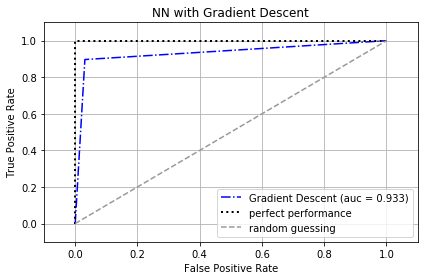

In [26]:
fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                 y_score=y_pred)
roc_plot(fpr, tpr, label='Gradient Descent', title='NN with Gradient Descent', save_as='GD/Spambase_roc')